<a href="https://colab.research.google.com/github/shumshersubashgautam/QuantumGAN-HighEnergyPhysics/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Mar  1 09:20:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from IPython.display import clear_output

In [3]:
!pip install -q tensorflow==2.7.0
clear_output()

In [4]:
!pip install pennylane-lightning[gpu]
clear_output()

In [5]:
!wget https://developer.download.nvidia.com/compute/cuquantum/redist/cuquantum/linux-x86_64/cuquantum-linux-x86_64-22.05.0.41-archive.tar.xz

--2023-03-01 09:22:03--  https://developer.download.nvidia.com/compute/cuquantum/redist/cuquantum/linux-x86_64/cuquantum-linux-x86_64-22.05.0.41-archive.tar.xz
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14859712 (14M) [application/octet-stream]
Saving to: ‘cuquantum-linux-x86_64-22.05.0.41-archive.tar.xz’

cuquantum-linux-x86 100%[===================>]  14.17M  27.3MB/s    in 0.5s    

2023-03-01 09:22:04 (27.3 MB/s) - ‘cuquantum-linux-x86_64-22.05.0.41-archive.tar.xz’ saved [14859712/14859712]



In [6]:
!tar -xvf cuquantum-linux-x86_64-22.05.0.41-archive.tar.xz

cuquantum-linux-x86_64-22.05.0.41-archive/
cuquantum-linux-x86_64-22.05.0.41-archive/include/
cuquantum-linux-x86_64-22.05.0.41-archive/include/cutensornet/
cuquantum-linux-x86_64-22.05.0.41-archive/include/cutensornet/types.h
cuquantum-linux-x86_64-22.05.0.41-archive/include/cutensornet.h
cuquantum-linux-x86_64-22.05.0.41-archive/include/custatevec.h
cuquantum-linux-x86_64-22.05.0.41-archive/pkg-config/
cuquantum-linux-x86_64-22.05.0.41-archive/pkg-config/custatevec-11.4.pc
cuquantum-linux-x86_64-22.05.0.41-archive/pkg-config/cutensornet-11.4.pc
cuquantum-linux-x86_64-22.05.0.41-archive/LICENSE
cuquantum-linux-x86_64-22.05.0.41-archive/docs/
cuquantum-linux-x86_64-22.05.0.41-archive/docs/cuQuantum_license.pdf
cuquantum-linux-x86_64-22.05.0.41-archive/lib/
cuquantum-linux-x86_64-22.05.0.41-archive/lib/libcustatevec.so.1
cuquantum-linux-x86_64-22.05.0.41-archive/lib/libcustatevec.so.1.0.0.41
cuquantum-linux-x86_64-22.05.0.41-archive/lib/libcutensornet.so.1
cuquantum-linux-x86_64-22.05.0

In [7]:
import os
os.environ['CUQUANTUM_ROOT']='/content/cuquantum-linux-x86_64-22.05.0.41-archive'
os.environ['CUQUANTUM_DIR']='/content/cuquantum-linux-x86_64-22.05.0.41-archive'
os.environ['LD_LIBRARY_PATH']=f"{os.environ['CUQUANTUM_ROOT']}/lib:{os.environ['LD_LIBRARY_PATH']}"
os.environ['CUQUANTUM_SDK']='/content/cuquantum-linux-x86_64-22.05.0.41-archive'

In [8]:
!sudo add-apt-repository ppa:ubuntu-toolchain-r/test
!sudo apt-get update
!sudo apt-get install gcc-10 g++-10

 Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

 More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,008 kB]
Get:10 http://security.ubuntu.com/u

In [9]:
!sudo update-alternatives --remove-all gcc
!sudo update-alternatives --remove-all g++

update-alternatives: error: no alternatives for gcc
update-alternatives: error: no alternatives for g++


In [10]:
!sudo update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-10 30
!sudo update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-10 30

update-alternatives: using /usr/bin/gcc-10 to provide /usr/bin/gcc (gcc) in auto mode
update-alternatives: using /usr/bin/g++-10 to provide /usr/bin/g++ (g++) in auto mode


In [11]:
!sudo update-alternatives --config gcc
!sudo update-alternatives --config g++

There is only one alternative in link group gcc (providing /usr/bin/gcc): /usr/bin/gcc-10
Nothing to configure.
There is only one alternative in link group g++ (providing /usr/bin/g++): /usr/bin/g++-10
Nothing to configure.


In [12]:
%env CC=/usr/bin/gcc
%env CXX=/usr/bin/g++
     

env: CC=/usr/bin/gcc
env: CXX=/usr/bin/g++


In [13]:
!git clone https://github.com/PennyLaneAI/pennylane-lightning-gpu.git

Cloning into 'pennylane-lightning-gpu'...
remote: Enumerating objects: 4058, done.
remote: Counting objects: 100% (4058/4058), done.
remote: Compressing objects: 100% (1029/1029), done.
remote: Total 4058 (delta 2979), reused 3943 (delta 2935), pack-reused 0
Receiving objects: 100% (4058/4058), 946.63 KiB | 27.84 MiB/s, done.
Resolving deltas: 100% (2979/2979), done.


In [14]:
%cd pennylane-lightning-gpu

/content/pennylane-lightning-gpu


In [15]:
!python -m pip install wheel cuquantum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 MB 7.5 MB/s eta 0:00:00


In [16]:
!python setup.py build_ext

/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:484: UserWarning: Normalizing '0.29.0-dev2' to '0.29.0.dev2'
  warnings.warn(tmpl.format(**locals()))
running build_ext
░█░░░▀█▀░█▀▀░█░█░▀█▀░█▀█░▀█▀░█▀█░█▀▀░░░░█▀▀░█▀█░█░█
░█░░░░█░░█░█░█▀█░░█░░█░█░░█░░█░█░█░█░░░░█░█░█▀▀░█░█
░▀▀▀░▀▀▀░▀▀▀░▀░▀░░▀░░▀░▀░▀▀▀░▀░▀░▀▀▀░▀░░▀▀▀░▀░░░▀▀▀

-- The CXX compiler identification is GNU 10.3.0
-- The C compiler identification is GNU 10.3.0
-- The CUDA compiler identification is NVIDIA 11.8.89
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/g++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/gcc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Check for working CUDA 

In [17]:
!python setup.py bdist_wheel

/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:484: UserWarning: Normalizing '0.29.0-dev2' to '0.29.0.dev2'
  warnings.warn(tmpl.format(**locals()))
running bdist_wheel
running build
running build_py
Generating grammar tables from /usr/lib/python3.8/lib2to3/Grammar.txt
Generating grammar tables from /usr/lib/python3.8/lib2to3/PatternGrammar.txt
copying pennylane_lightning_gpu/_version.py -> build/lib.linux-x86_64-3.8/pennylane_lightning_gpu
copying pennylane_lightning_gpu/_serialize.py -> build/lib.linux-x86_64-3.8/pennylane_lightning_gpu
copying pennylane_lightning_gpu/lightning_gpu.py -> build/lib.linux-x86_64-3.8/pennylane_lightning_gpu
copying pennylane_lightning_gpu/__init__.py -> build/lib.linux-x86_64-3.8/pennylane_lightning_gpu
creating build/lib.linux-x86_64-3.8/pennylane_lightning_gpu/src
copying pennylane_lightning_gpu/src/CMakeLists.txt -> build/lib.linux-x86_64-3.8/pennylane_lightning_gpu/src
running build_ext
░█░░░▀█▀░█▀▀░█░█░▀█▀░█▀█░▀█▀░█▀█░█▀▀░░░░█▀▀░█▀█░█░█


In [18]:
%cd ..

/content


In [19]:
import sympy as sp
import pandas as pd
import tensorflow as tf
import pennylane as qml
from pennylane import numpy as np
from pennylane.transforms.batch_input import batch_input
from abc import ABC
# import cirq
# from cirq.contrib.svg import SVGCircuit

from h5py import File as HDF5File
%matplotlib inline
import matplotlib.pyplot as plt

import keras.backend as K

In [20]:
!wget https://zenodo.org/record/269622/files/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5

--2023-03-01 09:30:13--  https://zenodo.org/record/269622/files/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2220068544 (2.1G) [application/octet-stream]
Saving to: ‘jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5’

jet-images_Mass60-1 100%[===================>]   2.07G  2.74MB/s    in 14m 59s 

2023-03-01 09:45:13 (2.36 MB/s) - ‘jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5’ saved [2220068544/2220068544]



In [21]:
jet_mass_datafile = '/content/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'
jet_mass_data = HDF5File(jet_mass_datafile, 'r')

In [22]:
print(jet_mass_data.keys())

<KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>


(872666, 25, 25)


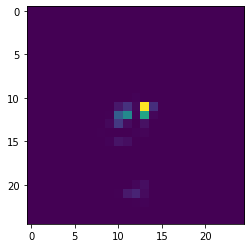

In [23]:
X_jet = jet_mass_data['image']
print(X_jet.shape)
plt.imshow(X_jet[5,:,:])

In [24]:
max_val_pix = np.argmax(np.mean(X_jet[:, :, :], axis=0))
print("Maximum pixel value for Jet mass images:",max_val_pix)
center = [int(max_val_pix/25), max_val_pix%25]

img_size = 16
X_jet = X_jet[:10, (center[0]-int(img_size/2)):(center[0]+int(img_size/2)), (center[1]-int(img_size/2)):(center[1]+int(img_size/2))]

print(X_jet.shape)
     

Maximum pixel value for Jet mass images: 312
(10, 16, 16)


In [25]:
def plot_jet_image(content,
#                     output_name,
                    vmin=1e-6,
                    vmax=300,
                    title=''):
    '''
    Function to help you visualize a jet image on a log scale
    Args:
    -----
       content : numpy array of dimensions 25x25, first arg to imshow, content of the image
                 e.g.: generated_images.mean(axis=0) --> the average generated image
                       real_images.mean(axis=0) --> the average Pythia image
                       generated_images[aux_out == 1].mean(axis=0) --> the average generated image labeled as real by the discriminator 
                       etc...
       output_name : string, name of the output file where the plot will be saved. Note: it will be located in ../plots/
       vmin : (default = 1e-6) float, lower bound of the pixel intensity scale before saturation
       vmax : (default = 300) float, upper bound of the pixel intensity scale before saturation
       title : (default = '') string, title of the plot, to be displayed on top of the image
    Outputs:
    --------
       no function returns
       saves file in ../plots/output_name
    '''
    fig, ax = plt.subplots(figsize=(7, 6))
    extent=[-1.25, 1.25, -1.25, 1.25]
    im = ax.imshow(content, interpolation='nearest', norm=LogNorm(vmin=vmin, vmax=vmax), extent=extent)
    cbar = plt.colorbar(im, fraction=0.05, pad=0.05)
    cbar.set_label(r'Pixel Pt(GeV)', y=0.85)
    plt.xlabel(r'[Transformed] Pseudorapidity')
    plt.ylabel(r'[Transformed] Azimuthal Angle')
    plt.title(title)

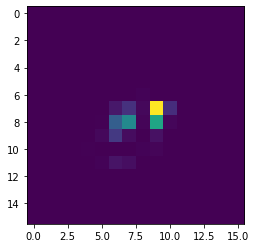

In [26]:
plt.imshow(X_jet[5,:,:])

In [27]:
def input_gates(wires,inputs):
  for wire in wires:
    qml.RY(inputs[wire],wires=wire)

In [28]:
def one_qubit_unitary(wire,symbols):
  return [qml.RX(symbols[0],wires=wire),
  qml.RY(symbols[1],wires=wire),
  qml.RZ(symbols[2],wires=wire)]

In [29]:
def two_qubit_unitary(wires):
  cx_ops = [qml.CNOT(wires=wire_link) for wire_link in zip(wires,wires[1:])]
  cx_ops += ([qml.CNOT(wires=[wires[-1],wires[0]]) if len(wires) != 2 else []])
  return cx_ops

In [30]:
def pqc_circuit_for_conv(wires,params,layers=1):
  num_wires = len(wires)
  # input_symbols = sp.symbols('x_:'+str(num_wires))
  # input_symbols = np.random.randn(num_wires)
  # param_symbols = sp.symbols('theta_:'+str(3*num_wires*layers))
  # param_symbols = np.random.randn(3*num_wires*layers)
  params = tf.reshape(params,(layers,num_wires,3))
  for layer in range(layers):
    for wire in wires:
      one_qubit_unitary(wire,params[layer,wire,:])
    two_qubit_unitary(wires)

In [31]:
wires_=4
dev = qml.device('default.qubit',wires=wires_)
# @batch_input(argnum=0)
@qml.qnode(dev)
def pqc_circuit_for_conv_demo(inputs,wires,layers=1):
  qml.AngleEmbedding(inputs,wires,rotation='Y')
  num_wires = len(wires)
  # input_symbols = sp.symbols('x_:'+str(num_wires))
  input_symbols = np.random.randn(num_wires)
  # param_symbols = sp.symbols('theta_:'+str(3*num_wires*layers))
  param_symbols = np.random.randn(3*num_wires*layers)
  param_symbols = np.reshape(param_symbols,(layers,num_wires,3))
  for layer in range(layers):
    for wire in wires:
      one_qubit_unitary(wire,param_symbols[layer,wire,:])
    two_qubit_unitary(wires)
  return qml.expval(qml.PauliZ(wires=wires[-1]))

/usr/local/lib/python3.8/dist-packages/pennylane/math/utils.py:223: UserWarning: Contains tensors of types {'autograd', 'tensorflow'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pennylane/math/utils.py:223: UserWarning: Contains tensors of types {'autograd', 'tensorflow'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


tf.Tensor(-0.2294348276364524, shape=(), dtype=float64)
tf.Tensor([[0.2986287  0.38277626 0.97082245 0.6091728 ]], shape=(1, 4), dtype=float32)


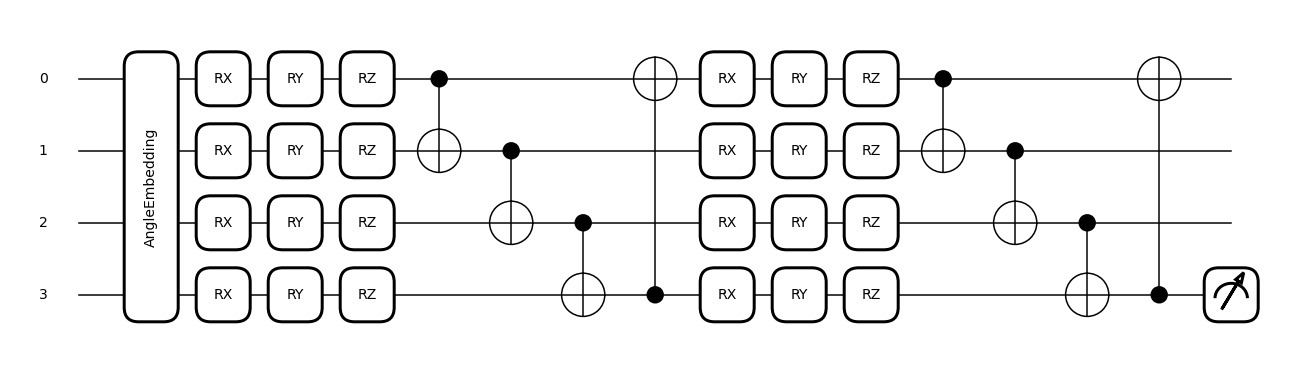

In [32]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

qml.drawer.use_style('black_white')
qml.draw_mpl(pqc_circuit_for_conv_demo)(inputs=tf.random.uniform(shape=(1,4)),wires=[i for i in range(wires_)],layers=2)
print(pqc_circuit_for_conv_demo(inputs=tf.random.uniform(shape=(1,4)),wires=[i for i in range(wires_)],layers=2))
print(tf.random.uniform(shape=(1,4)))

In [33]:
parameters = pqc_circuit_for_conv_demo.qtape.get_parameters(trainable_only=False)
print(parameters)
non_trainable, trainable = [], []
for idx, param in enumerate(parameters):
  if idx in [0]:
    non_trainable.append(param)
  else:
    trainable.append(param)
print(non_trainable[0].numpy())
for i in zip(*non_trainable):
  print(i)

[<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.94948876, 0.09110439, 0.81285584, 0.0704093 ]], dtype=float32)>, tensor(0.95330975, requires_grad=True), tensor(-0.21219312, requires_grad=True), tensor(-0.52911886, requires_grad=True), tensor(-0.86029143, requires_grad=True), tensor(0.04885845, requires_grad=True), tensor(1.57052759, requires_grad=True), tensor(0.22403735, requires_grad=True), tensor(-0.12698635, requires_grad=True), tensor(-1.16246531, requires_grad=True), tensor(0.04095314, requires_grad=True), tensor(-0.42129802, requires_grad=True), tensor(-0.99578289, requires_grad=True), tensor(-0.10923104, requires_grad=True), tensor(-0.36620607, requires_grad=True), tensor(-0.24131671, requires_grad=True), tensor(-0.96520334, requires_grad=True), tensor(0.43977045, requires_grad=True), tensor(-0.17443799, requires_grad=True), tensor(1.35393651, requires_grad=True), tensor(0.03374428, requires_grad=True), tensor(2.61719078, requires_grad=True), tensor(0.45250944, requir

In [34]:
# from pennylane.transforms import batch_input
# class QConvPQC(qml.qnn.KerasLayer):
#   def __init__(self,n_qubits,layers,name='Quantum_convolutional_layer') -> None:
#       super(QConvPQC,self).__init__(name=name)
#       self.main_name=name
#       self.layers=layers
#       self.qubits=[qubit for qubit in range(n_qubits)]
#       self.n_qubits=n_qubits
#       self.num_params=layers*n_qubits*3
#       self.dev = qml.device('lightning.gpu',wires=self.n_qubits)
      
#   def get_config(self):
#     config = super().get_config().copy()
#     config.update({
#         'number_of_qubits':self.n_qubits,
#         'number_of_layers':self.layers,
#         'number_of_parameters':self.num_params
#     })
#     return config

#   def build(self,input_shape):
    # param_vals = tf.random_uniform_initializer(minval=-np.pi,maxval=np.pi)
    # self.params = tf.Variable(initial_value=param_vals(shape=(1,self.num_params),dtype='float32'),
    #                           trainable = True,
    #                           name = self.main_name + '-parameters') 
    
#   def call(self,inputs):
#     batch_size = tf.shape(inputs)[0]
#     flattened_inputs = tf.keras.layers.Flatten()(inputs)
#     # @batch_input(argnum=0)
#     @qml.qnode(self.dev,interface="tf")
#     def convolutional_circuit(inputs,params,wires,layers):
#       # input_gates(inputs=inputs,wires=wires)
#       qml.AngleEmbedding(inputs, wires =wires, rotation="Y")
#       pqc_circuit_for_conv(params=params,wires=wires,layers=layers)
#       return qml.expval(qml.PauliZ(wires=wires[-1]))
#     return qml.qnn.KerasLayer(convolutional_circuit,weight_shapes={'params':(1,self.num_params),'wires':self.n_qubits,'layers':self.layers},o

In [35]:
def QConv_layer(inputs,layers,filter_size,stride,conv_id='',name='QConv_layer_'):
  iter = int(1 + (inputs.shape[1]-filter_size)/stride)
  n_qubits = filter_size*filter_size
  wires=[qubit for qubit in range(n_qubits)]
  dev = qml.device('lightning.gpu',wires=n_qubits)
  @qml.qnode(dev,interface="tf")
  def convolutional_circuit(inputs,params):
    # input_gates(inputs=inputs,wires=wires)
    qml.AngleEmbedding(inputs, wires =wires, rotation="Y")
    pqc_circuit_for_conv(params=params,wires=wires,layers=layers)
    return qml.expval(qml.PauliZ(wires=wires[-1]))
  # pqc = QConvPQC(n_qubits=n_qubits,layers=layers,name=name+conv_id) # 
  pqc = qml.qnn.KerasLayer(convolutional_circuit, weight_shapes={'params':layers*n_qubits*3},output_dim=1,name=name+conv_id)
  conv = []
  pqc.build(tf.shape(inputs))

  for i in range(iter):
    for j in range(iter):
      # pqc.build(tf.shape(inputs[:,stride*i:filter_size+i*stride,stride*i:filter_size+i*stride]))
      temp = pqc(tf.keras.layers.Flatten()(inputs[:,stride*i:filter_size+i*stride,stride*i:filter_size+i*stride]))
      conv += [temp]
  output_concat = tf.keras.layers.Concatenate(axis=1)(conv)
  output_reshape = tf.keras.layers.Reshape((iter,iter,1))(output_concat)
  return output_reshape

In [36]:
images = tf.random.normal(shape=(10,5,5,1))
# plt.imshow(images[0,:,:,0])
# print(images)
image_patches = tf.compat.v1.extract_image_patches(images,sizes=[1,2,2,1],strides=[1,1,1,1],rates=[1,1,1,1],padding='SAME')
print(image_patches.shape)
# print(image_patches)
print(image_patches[:,0,0,:])

(10, 5, 5, 4)
tf.Tensor(
[[ 1.7143236   1.2645892  -0.62609404  1.8947939 ]
 [-0.9841718  -0.9286807   0.12574475 -2.0192451 ]
 [ 0.41424677 -0.6356249   1.7402062   1.6517671 ]
 [-0.17860225  0.84923214 -0.4714313  -1.7089957 ]
 [-0.29249394 -0.8152246   0.3441792  -0.3724632 ]
 [ 1.4204444   0.28556404 -0.23594832  1.2064961 ]
 [ 0.98905575  1.8245661   0.35591906 -0.07459074]
 [ 0.16321693  0.86337805 -0.8559823  -1.3417927 ]
 [ 0.09719165 -0.95113605 -0.18147126  0.5119952 ]
 [ 1.5016663   0.6362197   0.6066841   0.60295296]], shape=(10, 4), dtype=float32)


In [37]:
r = tf.TensorShape([None,16,16]).concatenate(1)
print(r)

(None, 16, 16, 1)


In [38]:
layers = 2
filter_size = [4,3,2]
stride = [2,2,1]

def create_discriminator_j():
  data_inputs = tf.keras.Input(shape=(16, 16, 1,),dtype=tf.dtypes.float32,name='Input_layer')
  conv_1 = QConv_layer(inputs=data_inputs,layers=layers,filter_size=filter_size[0],stride=stride[0],conv_id='1') #
  conv_2 = QConv_layer(inputs=conv_1,layers=layers,filter_size=filter_size[1],stride=stride[1],conv_id='2')  #
  conv_3 = QConv_layer(inputs=conv_2,layers=layers,filter_size=filter_size[2],stride=stride[2],conv_id='3')  #
  conv_output = tf.keras.layers.Flatten()(conv_3)
  normalized_conv_output = tf.keras.layers.BatchNormalization(trainable=True)(conv_output)
  final_output = tf.keras.layers.Dense(1)(normalized_conv_output)
  model = tf.keras.Model(inputs=[data_inputs],outputs=[final_output])
  return model

In [39]:
data_inputs = tf.keras.Input(shape=(16,16,),dtype=tf.dtypes.float32,name='Input_layer')
flattened_data_inputs = tf.keras.layers.Flatten()(data_inputs)
print(flattened_data_inputs)
print(tf.shape(data_inputs)[1])

KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")
KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.int32, name=None), inferred_value=[16], name='tf.__operators__.getitem/strided_slice:0', description="created by layer 'tf.__operators__.getitem'")


In [137]:
# discriminator_model = create_discriminator_j()
# discriminator_model.summary()
# discriminator_model.trainable_variables

In [41]:
# def preprocess_inputs(inputs,filter_size,strides,rates,padding):
#   sizes = list((1,1)+filter_size)
#   strides = list((1,1)+strides)
#   rates = list((1,1)+rates)
#   depth=1
#   # inputs_with_depth = tf.expand_dims(inputs,axis=3)
#   # input_patches = tf.compat.v1.extract_image_patches(inputs,sizes=sizes,strides=strides,rates=rates,padding=padding)
#   input_patches = tf.image.extract_patches(inputs,sizes=sizes,strides=strides,rates=rates,padding=padding)
#   circuit_input_shape = tf.shape(input_patches[:,0,0,:])
#   return input_patches,circuit_input_shape
     

In [42]:
# def QConv_layer(inputs,layers,filter_size,strides,rates,padding,conv_id='',name='QConv_layer_'):
#   iter = int(inputs.shape[1])
#   n_qubits = filter_size[0]*filter_size[0]
#   wires=[qubit for qubit in range(n_qubits)]
#   dev = qml.device('lightning.gpu',wires=n_qubits)
#   @qml.qnode(dev,interface="tf")
#   def convolutional_circuit(inputs,params):
#     # input_gates(inputs=inputs,wires=wires)
#     qml.AngleEmbedding(inputs, wires =wires, rotation="Y")
#     pqc_circuit_for_conv(params=params,wires=wires,layers=layers)
#     return qml.expval(qml.PauliZ(wires=wires[-1]))
#   pqc = qml.qnn.KerasLayer(convolutional_circuit, weight_shapes={'params':layers*n_qubits*3},output_dim=1,name=name+conv_id)
#   conv = []
  
#   circuit_inputs,input_shape = preprocess_inputs(inputs=inputs,filter_size=filter_size,rates=rates,strides=strides,padding=padding)
#   pqc.build(input_shape)
#   for row in range(iter):
#     for col in range(iter):
#       temp = pqc(circuit_inputs[:,row,col,:])
#       conv += [temp]
#   output_concat = tf.keras.layers.Concatenate(axis=1)(conv)
#   # output_reshape = tf.keras.layers.Reshape((iter,iter,1))(output_concat)
#   output_reshape = tf.reshape(output_concat,shape=(-1,iter,iter,1))
#   return output_reshape 

In [43]:
# def create_generator_j():
#   data_inputs = tf.keras.Input(shape=(8, 8, 1,),dtype=tf.dtypes.float32,name='Input_layer')
#   conv_1 = QConv_layer(inputs=data_inputs,layers=2,filter_size=(3,3),strides=(1,1),rates=(1,1),padding = 'SAME' ,conv_id='1')
#   conv_2 = QConv_layer(inputs=conv_1,layers=2,filter_size=(4,4),strides=(1,1),rates=(1,1),padding = 'SAME' ,conv_id='2')
#   model = tf.keras.Model(inputs=[data_inputs],outputs=[conv_2])
#   return model

In [44]:
# def create_discriminator_j():
#   data_inputs = tf.keras.Input(shape=(8, 8, 1,),dtype=tf.dtypes.float32,name='Input_layer')
#   conv_1 = QConv_layer(inputs=data_inputs,layers=2,filter_size=(4,4),strides=(2,2),rates=(1,1),padding = 'SAME' ,conv_id='1')
#   conv_2 = QConv_layer(inputs=conv_1,layers=2,filter_size=(3,3),strides=(2,2),rates=(1,1),padding = 'SAME' ,conv_id='2')
#   conv_3 = QConv_layer(inputs=conv_2,layers=2,filter_size=(2,2),strides=(1,1),rates=(1,1),padding = 'SAME' ,conv_id='3')
#   model = tf.keras.Model(inputs=[data_inputs],outputs=[conv_3])
#   return model

In [45]:
# def create_classical_generator():
#     model = tf.keras.Sequential()
#     # foundation for 2x2 image
#     n_nodes = 64 * 2 * 2
#     model.add(tf.keras.layers.Dense(n_nodes, use_bias=False, input_shape=(100,)))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.LeakyReLU())
#     model.add(tf.keras.layers.Reshape((2, 2, 64)))

#     model.add(tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(1,1), padding="same", use_bias=False))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.LeakyReLU())

#     # model.add(tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(1,1), padding="same", use_bias=False))
#     # model.add(tf.keras.layers.BatchNormalization())
#     # model.add(tf.keras.layers.LeakyReLU())
    
#     # upsample to 4x4
#     model.add(tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding="same", use_bias=False))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.LeakyReLU())    
#     # upsample to 8x8
#     model.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=(2,2), padding="same", use_bias=False, activation='tanh'))
#     return model

In [65]:
# def get_output_shape(input_shape,filter_shape,stride,padding='same'):
#   if (input_shape[0] % stride[0] == 0):
#     pad_along_height = max(filter_shape[0] - stride[0], 0)
#   else:
#     pad_along_height = max(filter_shape[0] - (input_shape[0] % stride[0]), 0)
#   if (input_shape[1] % stride[1] == 0):
#     pad_along_width = max(filter_shape[1] - stride[1], 0)
#   else:
#     pad_along_width = max(filter_shape[1] - (input_shape[1] % stride[1]), 0)
#   pad_top = pad_along_height // 2
#   pad_bottom = pad_along_height - pad_top
#   pad_left = pad_along_width // 2
#   pad_right = pad_along_width - pad_left
#   paddings = tf.constant([[pad_top,pad_bottom],[pad_left,pad_right]])
#   rows = input_shape[0]+paddings[0][0]+paddings[0][1]
#   cols = input_shape[1]+paddings[1][0]+paddings[1][1]
#   padded_shape = tf.TensorShape([rows,cols])
#   new_rows = np.ceil(float(padded_shape[0] - filter_shape[0] + 1) / float(stride[0]))
#   new_cols = np.ceil(float(padded_shape[1] - filter_shape[1] + 1) / float(stride[1]))
#   return tf.TensorShape([int(new_rows), int(new_cols)])

In [47]:
(1,1)+(1,1)+(1,)

(1, 1, 1, 1, 1)

In [74]:
# class GeneratorConv2D(tf.keras.layers.Layer):
#   def __init__(self,layers,filters,filter_shape,stride,seed,parameter_sharing=True,padding='same',conv_id='',name='Quantum_Convolutional_Layer_with_padding'):
#     super(GeneratorConv2D,self).__init__()
#     self.layers=layers
#     self.filters = filters
#     self.parameter_sharing = parameter_sharing
#     self.filter_shape = filter_shape
#     self.n_qubits = filter_shape[0]*filter_shape[0]
#     self.stride = stride
#     self.padding = padding
#     self.main_name = name
#     self.num_params_per_circuit = self.layers*self.n_qubits*3
#     self.input_preprocess_ = self.input_preprocess()

#     self.dev = qml.device('lightning.gpu',wires=self.n_qubits)
#     self.wires=[qubit for qubit in range(self.n_qubits)]
#     @qml.qnode(self.dev,interface="tf")
#     def convolutional_circuit(inputs,params):
#       # input_gates(inputs=inputs,wires=wires)
#       qml.AngleEmbedding(inputs, wires = self.wires, rotation="Y")
#       pqc_circuit_for_conv(params=params,wires=self.wires,layers=self.layers)
#       return qml.expval(qml.PauliZ(wires=self.wires[-1]))
#     self.qnode = qml.qnn.KerasLayer(convolutional_circuit,weight_shapes={'params' :(self.num_params_per_circuit,1)},output_dim=1)

#   def build(self,input_shape):
#     super().build(input_shape)
#     # param_vals = tf.random_uniform_initializer(minval=-np.pi,maxval=np.pi)
#     # self.params = tf.Variable(initial_value=param_vals(shape=(1,self.num_params_per_circuit),dtype='float32'),
#     #                           trainable = True,
#     #                           name = self.main_name + '-parameters')
#     if len(input_shape) == 3:
#       self.input_rows = input_shape[1]
#       self.input_cols = input_shape[2]
#       self.input_channels = 1
#     else:
#       self.input_rows = input_shape[1]
#       self.input_cols = input_shape[2]
#       self.input_channels = input_shape[3]
#     output_shape = get_output_shape(input_shape[1:3], self.filter_shape, self.stride, self.padding)
#     self.output_rows = output_shape[0]
#     self.output_cols = output_shape[1]
#     self.inputs_preprocess_ = self.inputs_preprocess()
  
#   def compute_output_shape(self,input_shape):
#     return input_shape

#   def inputs_preprocess(self):
#     kernel_size = (1, 1) + self.filter_shape + (1,)
#     strides = (1, 1) + self.stride + (1,)
#     padding = self.padding.upper()
#     batchsize = lambda x: tf.gather(tf.shape(x), 0)
#     # planes = number of channels
#     planes = self.input_channels
#     rows = self.input_rows
#     cols = self.input_cols
#     depth = 1
#     reshaped_input_ = lambda x: tf.reshape(x, shape=(batchsize(x), rows, cols, planes))
#     # change input order to (batchsize, depth, rows, cols)
#     transposed_input = lambda x: tf.transpose(reshaped_input_(x), [0, 3, 1, 2])
#     reshaped_input = lambda x: tf.reshape(transposed_input(x), 
#                                               shape=(batchsize(x), planes, rows, cols, depth))
#     input_patches = lambda x: tf.extract_volume_patches(reshaped_input(x),
#                                             ksizes=kernel_size, strides=strides, padding=padding)
#     return input_patches 

#   def evaluate_qnode(self,inputs):
#     # @batch_input(argnum=0)
#     @qml.qnode(self.dev,interface="tf")
#     def convolutional_circuit(inputs,params):
#       # input_gates(inputs=inputs,wires=wires)
#       qml.AngleEmbedding(inputs, wires = self.wires, rotation="Y")
#       pqc_circuit_for_conv(params=params,wires=self.wires,layers=self.layers)
#       return qml.expval(qml.PauliZ(wires=self.wires[-1]))

#     evaluated_inputs = []
#     output_arr = []
#     samples = tf.shape(inputs)[0]
#     TensorArr = tf.TensorArray(tf.float32, 1, dynamic_size=True, infer_shape=False)
#     input_arr = TensorArr.unstack(inputs)
#     for i in range(samples):
#       input=input_arr.read(i)
#       output=convolutional_circuit(input,self.params)
#       output_arr.append(output)
#       # evaluated_inputs.append(self.evaluate_qnode(input))
#     # return tf.stack(evaluated_inputs)
    
#     # return self.convolutional_circuit(inputs,self.params)
#     return output_arr

#   def call(self,inputs):
#     batchsize = tf.gather(tf.shape(inputs), 0)
#     input_shape = tf.shape(inputs)
#     input_patches = self.inputs_preprocess_(inputs)
#     inputs = tf.reshape(input_patches, [batchsize, depth, 
#                                       self.output_rows, 
#                                       self.output_cols,
#                                       self.n_qubits])
#     # change to (depth, batchsize, rows, cols, symbols)
#     inputs = tf.transpose(inputs, [1, 0, 2, 3, 4])
#     tiled_up_inputs = tf.tile([inputs], [self.filters, 1, 1, 1, 1, 1])
#     tiled_up_inputs = tf.reshape(tiled_up_inputs, (self.filters*batchsize*depth*rows*cols, tf.shape(tiled_up_inputs)[-1]))
   
#     weight_shape =  (self.filters*batch_size*depth*rows*cols,num_params)

#     dev = qml.device('lightning.gpu',wires=self.n_qubits)
#     wires=[qubit for qubit in range(self.n_qubits)]
#     @qml.qnode(dev,interface="tf")
#     def convolutional_circuit(inputs,params):
#       # input_gates(inputs=inputs,wires=wires)
#       qml.AngleEmbedding(inputs, wires =wires, rotation="Y")
#       pqc_circuit_for_conv(params=params,wires=wires,layers=layers)
#       return qml.expval(qml.PauliZ(wires=wires[-1]))

#     result = qml.qnn.KerasLayer(convolutional_circuit,weight_shapes={'params': num_params},output_dim=1)(tiled_up_inputs)
#     super(GeneratorConv2D,self).__init__(qnode=convolutional_circuit,weight_shapes={'params':self.num_params_per_circuit},output_dim=(self.filters*batchsize*depth*rows*cols,1),batch_idx=0)
#     result = super().call(tiled_up_inputs)
#     evaluated_inputs = []
#     output_arr = []
#     samples = tf.shape(tiled_up_inputs)[0]
#     TensorArr = tf.TensorArray(tf.float32, 1, dynamic_size=True, infer_shape=False)
#     input_arr = TensorArr.unstack(tiled_up_inputs)
#     for i in range(samples):
#       input=input_arr.read(i)
#       # output=convolutional_circuit(input,self.params)
#       output=self.qnode(input,self.params)
#       output_arr.append(output)
#     result = output_arr
#     result = self.qnode(tiled_up_inputs,self.params)
#     result = self.evaluate_qnode(tiled_up_inputs)


#     result = self.qnode(tiled_up_inputs)

#     reshaped_output = tf.reshape(result,(self.filters, self.input_channels, batchsize, self.output_rows, self.output_cols))
#     summed_output = tf.reduce_mean(reshaped_output, axis=1)
#     final_output = tf.transpose(summed_output, [1, 2, 3, 0])
#     return tf.reshape(final_output, (batchsize, self.output_rows, self.output_cols, self.filters)) 

In [67]:
 def inputs_preprocess(inputs,filters,filter_shape,stride,padding,input_shape_,n_qubits):
    # if input_shape_ == 3:
    input_rows = tf.shape(inputs)[1]#input_shape_[1]
    input_cols = tf.shape(inputs)[2]#input_shape_[2]
    input_channels = 1
    # else:
    #   input_rows = input_shape_[1]
    #   input_cols = input_shape_[2]
    #   input_channels = input_shape_[3]
    output_shape = get_output_shape(input_shape_[1:3], filter_shape, stride, padding)
    output_rows = output_shape[0]
    output_cols = output_shape[1]
    kernel_size = (1, 1) + filter_shape + (1,)
    strides = (1, 1) + stride + (1,)
    padding = padding.upper()
    batchsize = lambda x: tf.gather(tf.shape(x), 0)
    # planes = number of channels
    # planes = input_channels
    # rows = input_rows
    # cols = input_cols
    depth=1
    reshaped_input_ = lambda x: tf.reshape(x, shape=(batchsize(x), input_rows, input_cols, input_channels))
    # change input order to (batchsize, depth, rows, cols)
    transposed_input = lambda x: tf.transpose(reshaped_input_(x), [0, 3, 1, 2])
    reshaped_input = lambda x: tf.reshape(transposed_input(x), 
                                              shape=(batchsize(x), input_channels, input_rows, input_cols, depth))
    input_patches = lambda x: tf.extract_volume_patches(reshaped_input(x),
                                            ksizes=kernel_size, strides=strides, padding=padding)
    inputs_ = tf.reshape(input_patches, [batchsize, depth, 
                                      output_rows, 
                                      output_cols,
                                      n_qubits])
    # change to (depth, batchsize, rows, cols, symbols)
    inputs_ = tf.transpose(inputs_, [1, 0, 2, 3, 4])
    tiled_up_inputs = tf.tile([inputs_], [filters, 1, 1, 1, 1, 1])
    tiled_up_inputs = tf.reshape(tiled_up_inputs, (filters*batchsize*depth*input_rows*input_cols, tf.shape(tiled_up_inputs)[-1]))
    
    return tiled_up_inputs,input_channels,output_cols,output_rows
     

In [68]:
def GeneratorConv_2D(inputs,layers,filters,stride,filter_shape,parameter_sharing='True',padding='same',conv_id='',name='QConv_layer_'):
  input_shape_ = tf.shape(inputs)
  n_qubits = filters*filters
  model_inputs,input_channels,output_cols,output_rows = inputs_preprocess(inputs,filters,filter_shape,stride,padding,input_shape_,n_qubits)
  batchsize = tf.shape(inputs)[0]
  iter = int(1 + (inputs.shape[1]-filter_size)/stride)
  wires=[qubit for qubit in range(n_qubits)]
  dev = qml.device('lightning.gpu',wires=n_qubits)
  @qml.qnode(dev,interface="tf")
  def convolutional_circuit(inputs,params):
    # input_gates(inputs=inputs,wires=wires)
    qml.AngleEmbedding(inputs, wires =wires, rotation="Y")
    pqc_circuit_for_conv(params=params,wires=wires,layers=layers)
    return qml.expval(qml.PauliZ(wires=wires[-1]))
  # pqc = QConvPQC(n_qubits=n_qubits,layers=layers,name=name+conv_id) # 
  pqc = qml.qnn.KerasLayer(convolutional_circuit, weight_shapes={'params':layers*n_qubits*3},output_dim=1,name=name+conv_id)
  pqc.build(tf.shape(model_inputs))
  result = pqc(model_inputs)
  reshaped_output = tf.reshape(result,(filters, input_channels, batchsize, output_rows, output_cols))
  summed_output = tf.reduce_mean(reshaped_output, axis=1)
  final_output = tf.transpose(summed_output, [1, 2, 3, 0])
  return tf.reshape(final_output, (batchsize, output_rows, output_cols, filters)) 

In [69]:
def create_generator_j():
  model = tf.keras.Sequential(name = 'Generator')
  model.add(tf.keras.layers.Input(shape=(256), dtype=tf.float32))
  model.add(tf.keras.layers.Reshape((16, 16, 1)))
  model.add(GeneratorConv2D(layers=1, filter_shape=(3, 3),conv_id ='1',
                      filters=2, stride=(1, 1), padding="same", parameter_sharing=True,seed=2021
                      ))
  model.add(GeneratorConv2D(layers=2, filter_shape=(2, 2),conv_id = '2',
                      filters=1, stride=(1, 1), padding="same", parameter_sharing=True,seed=2022,
                      ))
  return model

In [70]:
def create_generator_j():
  inputs = tf.keras.Input(shape=(16,16,),dtype=tf.dtypes.float32,name='Input_layer')
  layer1=GeneratorConv2D(layers=1, filter_shape=(3, 3),conv_id ='1',seed=2021,
                      filters=2, stride=(1, 1), padding="same", parameter_sharing=True,
                      )
  inputs_1 = layer1.call(inputs)
  layers = GeneratorConv2D(layers=1, filter_shape=(3, 3),conv_id ='1',seed=2022,
                      filters=2, stride=(1, 1), padding="same", parameter_sharing=True,
                      )
  output = layer2.call(inputs_1)
  return tf.keras.Model(inputs=[inputs],outputs=[output])
     

In [63]:
def create_generator_j():
  inputs = tf.keras.Input(shape=(16,16,),dtype=tf.dtypes.float32,name='Input_layer')
  inputs_1 = GeneratorConv_2D(inputs,layers=1, filter_shape=(3, 3),conv_id ='1',
                      filters=2, stride=(1, 1), padding="same", parameter_sharing=True,
                      )
  output = GeneratorConv_2D(inputs_1,layers=1, filter_shape=(3, 3),conv_id ='1',
                      filters=2, stride=(1, 1), padding="same", parameter_sharing=True,
                      )
  return tf.keras.Model(inputs=[inputs],outputs=[output])

In [72]:
#generator_model = create_generator_j()
generator_model = create_classical_generator()
generator_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               25600     
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 reshape_1 (Reshape)         (None, 2, 2, 64)          0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 2, 2, 32)         8192      
 ranspose)                                                       
                                                                 
 batch_normalization_4 (Batc  (None, 2, 2, 32)        

In [73]:
discriminator_model = create_discriminator_j()
discriminator_model.summary()
discriminator_model.trainable_variables

ValueError: ignored

In [56]:
# class QGAN():
#   def __init__(self,discriminator,generator,disc_optimizer,gen_optimizer):
#     self.generator_model = generator
#     self.discriminator_model = discriminator
#     self.d_opt = disc_optimizer
#     self.g_opt = gen_optimizer
#     # self.g_lr = gen_learning_rate
#     # self.d_lr = disc_learning_rate
#     self.loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
#     self.gen_loss_ = []
#     self.disc_loss_ = []
#     self.epochs_ = []
#     # self.d_opt = self.d_opt(self.d_lr)
#     # self.g_opt = self.g_opt(self.g_lr)

#   def prepare_dataset(self,data,batch_size,seed=None,drop_remainder=True,buffer_size=100):
#     buffer_size =len(data[0])
#     ds = tf.data.Dataset.from_tensor_slices(data)
#     ds = ds.shuffle(buffer_size=buffer_size,seed=seed,reshuffle_each_iteration=True)
#     ds = ds.batch(batch_size,drop_remainder)
#     ds = ds.prefetch(tf.data.AUTOTUNE)
#     return ds

#   def train_preprocess(self,random_state):
#     tf.random.set_seed(random_state)
#     np.random.seed(random_state)
  
#   @tf.function
#   def generator_loss(self,fake_output):
#     return self.loss(tf.ones_like(fake_output),fake_output)

#   @tf.function
#   def discriminator_loss(self,real_output,fake_output):
#     real_loss = self.loss(tf.ones_like(real_output),real_output)
#     fake_loss = self.loss(tf.zeros_like(fake_output),fake_output)
#     return real_loss + fake_loss
  
#   @tf.function
#   def train_step_1v1(self,x_real,batch_size):
#     """Training step for one epoch with 1 generator step and 1 discriminator step
#         """
#     fake_data_shape = (batch_size,) + self.generator_model.input_shape[1:]
#     z = tf.random.normal(shape=fake_data_shape)
#     with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#       x_fake_ = self.generator_model(z, training=True)
#       # x_fake = tf.reshape(x_fake_, tf.shape(x_real))
#       real_output = self.discriminator_model(x_real, training=True)
#       fake_output = self.discriminator_model(x_fake_, training=True)
#       gen_loss = self.generator_loss(fake_output)
#       disc_loss = self.discriminator_loss(real_output, fake_output)
#     grad_gen = gen_tape.gradient(gen_loss, self.generator_model.trainable_variables)
#     grad_disc = disc_tape.gradient(disc_loss, self.discriminator_model.trainable_variables)
#     self.g_opt.apply_gradients(zip(grad_gen, self.generator_model.trainable_variables))
#     self.d_opt.apply_gradients(zip(grad_disc, self.discriminator_model.trainable_variables))  
#     return gen_loss, disc_loss

#   @tf.function
#   def train_step_nv1(self,x_real,n_disc,batch_size):
#     for i in range(n_disc):
#       x_real_batch = tf.gather(x_real,i)
#       d_loss = self.discriminator_step(x_real_batch,batch_size)
#     g_loss = self.generator_step(batch_size)
#     return g_loss, d_loss

#   @tf.function
#   def train_step_1vn(self,x_real,n_gen,batch_size):
#     for i in range(n_gen):
#       g_loss = self.generator_step(batch_size)
#     d_loss = self.discriminator_step(x_real,batch_size)
#     return g_loss, d_loss 

#   @tf.function
#   def discriminator_step(self,x_real,batch_size):
#     fake_data_shape = (batch_size,) + self.generator_model.input_shape[1:]
#     # x_real = tf.reshape(x_real,fake_data_shape)
#     z = tf.random.normal(shape=fake_data_shape)
#     with tf.GradientTape() as gradient_tape:
#       real_output = self.discriminator_model(x_real,training = True)
#       fake_input = self.generator_model(z, training = True) 
#       # fake_input = tf.reshape(fake_input, tf.shape(x_real))
#       fake_output = self.discriminator_model(fake_input,training = True)
#       cost = self.discriminator_loss(real_output,fake_output)
#     grad = gradient_tape.gradient(cost,self.discriminator_model.trainable_variables)
#     self.d_opt.apply_gradients(zip(grad,self.discriminator_model.trainable_variables))
#     return cost

#   @tf.function
#   def generator_step(self,batch_size):
#     fake_data_shape = (batch_size,) + self.generator_model.input_shape[1:]
#     z = tf.random.normal(shape=fake_data_shape)
#     with tf.GradientTape() as gradient_tape:
#       fake_input = self.generator_model(z,training=True)
#       fake_output = self.discriminator_model(fake_input,training= True) #
#       loss = self.generator_loss(fake_output)
#     grad = gradient_tape.gradient(loss,self.generator_model.trainable_variables)
#     self.g_opt.apply_gradients(zip(grad,self.generator_model.trainable_variables))
#     return loss
  
#   def train_qgans(self,x,epochs,batch_size,seed=1024,n_disc=1,n_gen=1):
#     input_shape = x.shape[1:]
#     self.train_preprocess(seed)
#     data = self.prepare_dataset(data=x,batch_size=batch_size*n_disc,seed=seed)
#     g_metric = tf.keras.metrics.Mean()
#     d_metric = tf.keras.metrics.Mean()
#     for epoch in range(epochs):
#       for step,training_batch_data_ in enumerate(data):
#         # training_batch_data = tf.reshape(training_batch_data_,input_batch_shape)
#         if( n_disc == 1 and n_gen == 1):
#           input_batch_shape = (batch_size,) + input_shape
#           training_batch_data = tf.reshape(training_batch_data_,input_batch_shape)
#           gen_loss,disc_loss = self.train_step_1v1(x_real=training_batch_data, batch_size=batch_size)
#         if n_disc > 1 and n_gen == 1:
#           input_batch_shape = (n_disc, batch_size) + input_shape
#           training_batch_data = tf.reshape(training_batch_data_,input_batch_shape)        
#           gen_loss,disc_loss = self.train_step_nv1(x_real=training_batch_data, batch_size=batch_size,n_disc=n_disc)
#         if n_gen > 1 and n_disc == 1:
#           input_batch_shape = (batch_size,) + input_shape
#           training_batch_data = tf.reshape(training_batch_data_,input_batch_shape)
#           gen_loss,disc_loss = self.train_step_1vn(x_real=training_batch_data, batch_size=batch_size,n_gen=n_gen)
#         g_metric(gen_loss)
#         d_metric(disc_loss)
#       self.gen_loss_.append(g_metric.result().numpy())
#       self.disc_loss_.append(d_metric.result().numpy())
#       self.epochs_.append(epoch)
#       print("Epoch:{} ;   generator_loss:{} ;   discriminator_loss:{}".format(epoch,g_metric.result().numpy(),d_metric.result().numpy()))
  
#       g_metric.reset_state()
#       d_metric.reset_state()
#     return self.gen_loss_,self.disc_loss_,self.epochs_

#   def generate_samples(self,batch_size, shape=None):
#     """Generates sample using random inputs
        
#             Arguments:
#                 batch_size: int
#                     Number of samples to generate.
#                 shape: (Optional) tuple of int
#                     Reshape the output to the given shape.
#         """
#     z_batch_shape = (batch_size,) + self.generator_model.input_shape[1:]
#     z = tf.random.normal(z_batch_shape)
#     print(z.shape[0])
#     samples = self.generator_model(z,training = False)
#     # samples = generator_model
#     # if shape is not None:
#     #   shape = (batch_size,) + shape
#     #   samples = tf.reshape(samples, shape)
#     return samples

#   def predict(self, x):
#     return self.discriminator_model(x, training=False)

In [59]:
# fake_data_shape = (10000,) + generator_model.input_shape[1:]
# print(fake_data_shape)
# print(generator_model.output_shape)
# print(discriminator_model.input_shape)

(10000, 100)
(None, 8, 8, 1)


NameError: ignored

In [ ]:
d_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
g_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.005)
model = QGAN(generator=generator_model,discriminator=discriminator_model,disc_optimizer=d_optimizer,gen_optimizer=g_optimizer)

In [ ]:
X_jet_final = np.reshape(X_jet, (X_jet.shape[0], 16, 16, 1))
gen_loss_,disc_loss_,epochs_ = model.train_qgans(X_jet,epochs=10,batch_size=2,seed=2021,n_gen=10)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plot_loss(gen_loss,disc_loss,epochs):
  fig = plt.figure(figsize=(16,9))
  gs = gridspec.GridSpec(ncols=8, nrows=8, figure=fig)
  epoch = epochs[-1]
  # plot loss curve
  ax_loss = plt.subplot(gs[:,:4])
  ax_loss.set_xlim(0, 1.1*epoch)
  ax_loss.plot(epochs, gen_loss, label="Generator")
  ax_loss.plot(epochs, disc_loss, label="Discriminator")
  ax_loss.set_xlabel('Epoch', fontsize=20)
  ax_loss.set_ylabel('Loss', fontsize=20)
  ax_loss.grid(True)
  ax_loss.legend(fontsize=15)

In [ ]:
plot_loss(gen_loss_,disc_loss_,epochs_)

In [ ]:
n_images = 8
samples = np.reshape(np.array(model.generate_samples(batch_size=n_images,shape=(5,))),(n_images,16,16))
fig = plt.figure(figsize=(26,18))
gs = gridspec.GridSpec(ncols=8, nrows=8, figure=fig)
for i in range(samples.shape[0]):
  ax = plt.subplot(gs[i//4, 4 + i%4])
  plt.imshow(samples[i])
     

In [76]:
from IPython.display import clear_output
!pip install tensorflow==2.7.0
clear_output()

In [77]:
from IPython.display import clear_output
!pip install tensorflow-quantum==0.6.0 --use-deprecated=legacy-resolver
clear_output()

In [92]:
electron_datafile = '/content/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'
photon_datafile = '/content/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'

In [93]:
electron_data = HDF5File(electron_datafile, 'r')
photon_data = HDF5File(photon_datafile, 'r')

In [94]:
print(electron_data.keys())

<KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>


In [78]:
jet_mass_datafile = '/content/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'
jet_mass_data = HDF5File(jet_mass_datafile, 'r')

In [79]:
print(jet_mass_data.keys())

<KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>


(872666, 25, 25)


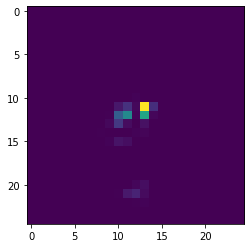

In [80]:
X_jet = jet_mass_data['image']
print(X_jet.shape)
plt.imshow(X_jet[5,:,:])

In [136]:
# max_val_pix = np.argmax(np.mean(X_jet[:, :, :], axis=0))
# print("Maximum pixel value for Jet mass images:",max_val_pix)
# center = [int(max_val_pix/25), max_val_pix%25]

# img_size = 8
# X_jet = X_jet[:100, (center[0]-int(img_size/2)):(center[0]+int(img_size/2)), (center[1]-int(img_size/2)):(center[1]+int(img_size/2))]

# print(X_jet.shape)

In [96]:
# def plot_jet_image(content,
# #                     output_name,
#                     vmin=1e-6,
#                     vmax=300,
#                     title=''):
#     '''
#     Function to help you visualize a jet image on a log scale
#     Args:
#     -----
#        content : numpy array of dimensions 25x25, first arg to imshow, content of the image
#                  e.g.: generated_images.mean(axis=0) --> the average generated image
#                        real_images.mean(axis=0) --> the average Pythia image
#                        generated_images[aux_out == 1].mean(axis=0) --> the average generated image labeled as real by the discriminator 
#                        etc...
#        output_name : string, name of the output file where the plot will be saved. Note: it will be located in ../plots/
#        vmin : (default = 1e-6) float, lower bound of the pixel intensity scale before saturation
#        vmax : (default = 300) float, upper bound of the pixel intensity scale before saturation
#        title : (default = '') string, title of the plot, to be displayed on top of the image
#     Outputs:
#     --------
#        no function returns
#        saves file in ../plots/output_name
#     '''
#     fig, ax = plt.subplots(figsize=(7, 6))
#     extent=[-1.25, 1.25, -1.25, 1.25]
#     im = ax.imshow(content, interpolation='nearest', norm=LogNorm(vmin=vmin, vmax=vmax), extent=extent)
#     cbar = plt.colorbar(im, fraction=0.05, pad=0.05)
#     cbar.set_label(r'Pixel Pt (GeV)', y=0.85)
#     plt.xlabel(r'[Transformed] Pseudorapidity')
#     plt.ylabel(r'[Transformed] Azimuthal Angle')
#     plt.title(title)

In [100]:
# X_e, y_e = electron_data['jet_delta_R'], electron_data['jet_phi']
# X_e_0 = X_e[0]
# X_e_1 = X_e[1]
# print(X_e_0.shape)
# print(y_e.shape)

()
(872666,)


In [135]:
# import cirq

In [134]:
# plot_jet_image(X_e_0[1],title = 'Electron_image')

In [133]:
# def one_qubit_unitary(qubit, symbols):
#   return cirq.Circuit(
#     [cirq.rx(symbols[0])(qubit),
#       cirq.ry(symbols[1])(qubit),
#       cirq.rz(symbols[2])(qubit)]
#   )
     

In [132]:
# def two_qubit_unitary(qubits):
#   cx_ops = [cirq.CX(q0, q1) for q0, q1 in zip(qubits, qubits[1:])]
#   cx_ops += ([cirq.CX(qubits[-1], qubits[0])] if len(qubits) != 2 else [])
#   return cx_ops
     

In [131]:
# def pqc_circuit_for_conv(qubits,layers):
#   circuit = cirq.Circuit()
#   num_qubits = len(qubits)
#   input_symbols = sp.symbols('x_:'+str(num_qubits))
#   param_symbols = sp.symbols('theta_:'+str(3*num_qubits*layers))
#   param_symbols = np.reshape(param_symbols,(layers,num_qubits,3))
#   for i in range(num_qubits):
#     circuit += cirq.ry(input_symbols[i])(qubits[i])
  
#   for layer in range(layers):
#     for i,q in enumerate(qubits):
#       circuit += one_qubit_unitary(q,param_symbols[layer,i,:])
#     circuit += two_qubit_unitary(qubits)
  
#   return circuit,input_symbols,list(param_symbols.flat)

In [116]:
# plot_jet_image(X_jet[0],title = 'Jet_image')

In [117]:
# demo_circuit,i_symbols,p_symbols = pqc_circuit_for_conv(cirq.GridQubit.rect(1,4),layers=2)
# SVGCircuit(demo_circuit)

In [123]:
import numpy as np 
import sympy as sp
from h5py import File as HDF5File
%matplotlib inline
import matplotlib.pyplot as plt
from QGANSHEP import preprocess_utils, visualizations

In [119]:
cd ..

/


In [120]:
cd content

/content


In [121]:
!git clone https://github.com/Amey-2002/GSoC_2022_QMLHEP

Cloning into 'GSoC_2022_QMLHEP'...
remote: Enumerating objects: 280, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 280 (delta 25), reused 39 (delta 12), pack-reused 212
Receiving objects: 100% (280/280), 3.11 MiB | 20.84 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [122]:
%cd GSoC_2022_QMLHEP

/content/GSoC_2022_QMLHEP


In [124]:
jet_mass_datafile = '/content/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'
jet_mass_data = HDF5File(jet_mass_datafile, 'r')

In [125]:
print(jet_mass_data.keys())

<KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>


(872666, 25, 25)


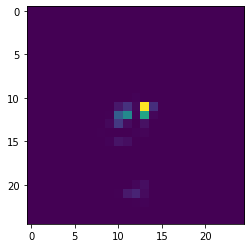

In [126]:
X_jet = jet_mass_data['image']
print(X_jet.shape)
plt.imshow(X_jet[5,:,:])

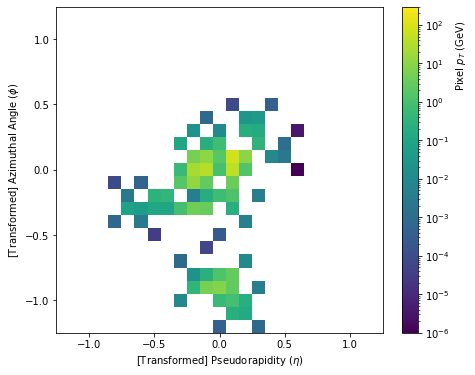

In [127]:
visualizations.plot_log_scale_image(X_jet[5,:,:])

In [128]:
X_jet = preprocess_utils.crop_images(X_jet[:100,:,:],(8,8))

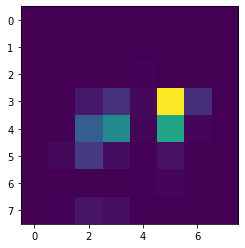

In [129]:
plt.imshow(X_jet[5,:,:])

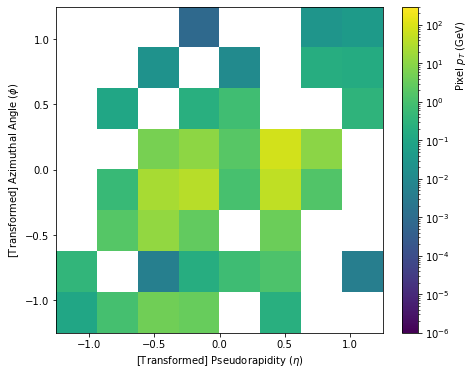

In [130]:
visualizations.plot_log_scale_image(X_jet[5,:,:]) #rectify by reuploading visualizations.py on drive